In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup as soup
import json
import time

from sklearn.linear_model import LinearRegression, Ridge, RidgeCV
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')

In [38]:
path = '/Users/ivylai/Desktop/Galvanize/clean_apt_data.csv'
data = pd.read_csv(path)

In [108]:
path = '/Users/ivylai/Desktop/Galvanize/clean_apt_data_norange.csv'
data_norange = pd.read_csv(path)

In [109]:
# data_norange.drop(columns = ['Unnamed: 0','rent_range','sq_ft_range'], inplace = True)
data_norange.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7122 entries, 0 to 7121
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   url               7122 non-null   object 
 1   property_name     7122 non-null   object 
 2   city              7122 non-null   object 
 3   rent_updated      7122 non-null   float64
 4   n_bed             7122 non-null   int64  
 5   n_bath            7122 non-null   float64
 6   sq_ft_updated     7122 non-null   float64
 7   walkscore         7122 non-null   float64
 8   allow_pet         7122 non-null   int64  
 9   minimum_lease     7122 non-null   int64  
 10  onsite_parking    7122 non-null   int64  
 11  pool              7122 non-null   int64  
 12  fitness_center    7122 non-null   int64  
 13  elevator          7122 non-null   int64  
 14  kitchen_features  7122 non-null   int64  
 15  security_system   7122 non-null   int64  
 16  washer_dryer      7122 non-null   int64  


In [111]:
data_norange.rent_updated.describe()

count     7122.000000
mean      3083.947065
std       2118.194388
min        500.000000
25%       2030.750000
50%       2725.000000
75%       3550.000000
max      65000.000000
Name: rent_updated, dtype: float64

In [112]:
print(np.percentile(data_norange.rent_updated, 85))
print(np.percentile(data_norange.rent_updated, 5))

4176.0
1370.0


Text(0.5, 1.0, 'Rental Price Distribution')

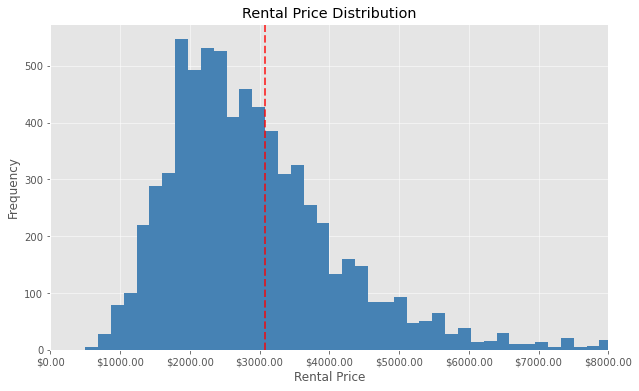

In [113]:
fig, ax = plt.subplots(figsize = (10,6))
ax.hist(data_norange['rent_updated'], bins = 350, color = 'steelblue')
ax.axvline(x = np.mean(data_norange['rent_updated']), c ='red', alpha = 0.7, linestyle = '--')
ax.set_xlim(left = 0, right = 8000)
ax.xaxis.set_major_formatter('${x:1.2f}')
ax.set_xlabel('Rental Price')
ax.set_ylabel('Frequency')
ax.set_title('Rental Price Distribution')

In [39]:
# data.drop(columns = ['Unnamed: 0'], inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15588 entries, 0 to 15587
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   url               15588 non-null  object 
 1   property_name     15588 non-null  object 
 2   city              15588 non-null  object 
 3   rent_updated      15588 non-null  float64
 4   n_bed             15588 non-null  int64  
 5   n_bath            15588 non-null  float64
 6   sq_ft_updated     15588 non-null  float64
 7   walkscore         15588 non-null  float64
 8   allow_pet         15588 non-null  int64  
 9   minimum_lease     15588 non-null  int64  
 10  onsite_parking    15588 non-null  int64  
 11  pool              15588 non-null  int64  
 12  fitness_center    15588 non-null  int64  
 13  elevator          15588 non-null  int64  
 14  kitchen_features  15588 non-null  int64  
 15  security_system   15588 non-null  int64  
 16  washer_dryer      15588 non-null  int64 

In [94]:
data.rent_updated.describe()

count    15588.000000
mean      3110.892257
std       1850.622968
min        500.000000
25%       2183.375000
50%       2799.000000
75%       3609.625000
max      65000.000000
Name: rent_updated, dtype: float64

In [98]:
print(np.percentile(data.rent_updated, 85))
print(np.percentile(data.rent_updated, 5))

4170.0
1495.0


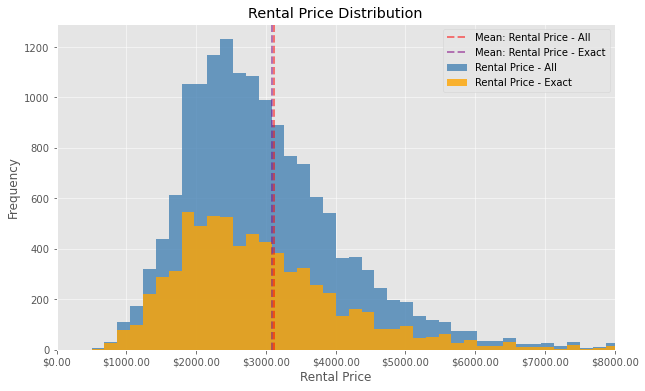

In [116]:
fig, ax = plt.subplots(figsize = (10,6))
ax.hist(data['rent_updated'], bins = 350, color = 'steelblue',alpha = 0.8, label = 'Rental Price - All')
ax.axvline(x = np.mean(data['rent_updated']), c ='red', alpha = 0.5, linestyle = '--', label = 'Mean: Rental Price - All')
ax.hist(data_norange['rent_updated'], bins = 350, color = 'orange',  alpha = 0.8, label = 'Rental Price - Exact')
ax.axvline(x = np.mean(data_norange['rent_updated']), c ='purple', alpha = 0.5, linestyle = '--', label = 'Mean: Rental Price - Exact')
ax.set_xlim(left = 0, right = 8000)
ax.xaxis.set_major_formatter('${x:1.2f}')
ax.set_xlabel('Rental Price')
ax.set_ylabel('Frequency')
ax.set_title('Rental Price Distribution')
ax.legend()

Text(0.5, 1.0, 'Top 5 Cities with the Most Listings')

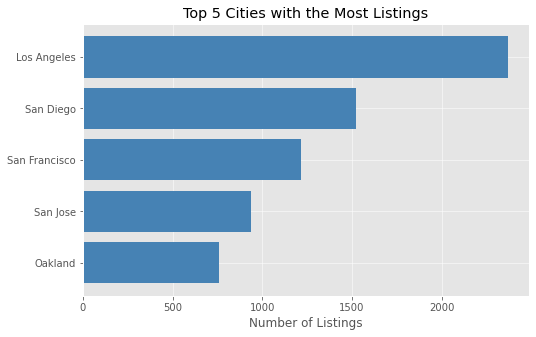

In [89]:
city_lst = []
cities, count = np.unique(data['city'].to_numpy(), return_counts = True)
for city, n in zip(cities, count):
    city_lst.append((city, n))
    
sorted_city = sorted(city_lst,key=lambda x: x[1], reverse=True)
top5_cities = [x[0] for x in sorted_city[:5]][::-1]
top5_n = [x[1] for x in sorted_city[:5]][::-1]

fig, ax = plt.subplots(figsize = (8,5))
ax.barh(top5_cities, top5_n, color = 'steelblue')
ax.set_xlabel('Number of Listings')

ax.set_title('Top 5 Cities with the Most Listings')

Text(0.5, 1.0, 'Top 5 Cities with the Most Listings')

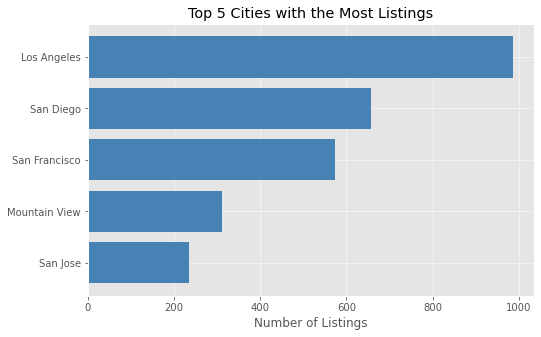

In [117]:
city_lst = []
cities, count = np.unique(data_norange['city'].to_numpy(), return_counts = True)
for city, n in zip(cities, count):
    city_lst.append((city, n))
    
sorted_city = sorted(city_lst,key=lambda x: x[1], reverse=True)
top5_cities = [x[0] for x in sorted_city[:5]][::-1]
top5_n = [x[1] for x in sorted_city[:5]][::-1]

fig, ax = plt.subplots(figsize = (8,5))
ax.barh(top5_cities, top5_n, color = 'steelblue')
ax.set_xlabel('Number of Listings')

ax.set_title('Top 5 Cities with the Most Listings')

In [24]:
# Manually get the top 5 average

header = {"User-Agent": "Mozilla/5.0 (X11; CrOS x86_64 12871.102.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/81.0.4044.141 Safari/537.36"}
city_page_url = 'https://www.apartments.com/oakland-ca/'

r = requests.get(city_page_url, timeout = 30, headers = header)
if r.status_code == 200:
    page_soup = soup(r.content, 'html.parser')
    script = page_soup.find('script',type='application/ld+json')
        
    script_json = json.loads(str(script)[41:-11])

# script_json

In [26]:
sf_avg_rent = {'Studio': '$2,660', '1 Bedroom': '$2,626', '2 Bedroom': '$3,743', '3 Bedroom': '$3,948'}
la_avg_rent = {'Studio': '$1,183', '1 Bedroom': '$1,891', '2 Bedroom': '$2,427', '3 Bedroom': '$3,988'}
sd_avg_rent = {'Studio': '$1,585', '1 Bedroom': '$1,340', '2 Bedroom': '$1,707', '3 Bedroom': '$3,112'}
sj_avg_rent = {'Studio': '$1,889', '1 Bedroom': '$2,156', '2 Bedroom': '$2,885', '3 Bedroom': '$4,032'}
okl_avg_rent = {'Studio': '$1,408', '1 Bedroom': '$1,559', '2 Bedroom': '$1,835', '3 Bedroom': '$2,479'}
total_avg_rent = {'Studio': '$2,209', '1 Bedroom': '$2,662', '2 Bedroom': '$3,399', '3 Bedroom': '$4,284'}

sf = pd.DataFrame([sf_avg_rent], index = ['San Francisco'])
la = pd.DataFrame([la_avg_rent], index = ['Los Angeles'])
sd = pd.DataFrame([sd_avg_rent], index = ['San Diego'])
sj = pd.DataFrame([sj_avg_rent], index = ['San Jose'])
oak = pd.DataFrame([okl_avg_rent], index = ['Oakland'])
avg = pd.DataFrame([total_avg_rent], index = ['Overall Average'])

top5_avg = pd.concat([la,sd,sf,sj,oak, avg])
top5_avg_numeric = top5_avg.replace('[\$\,\.]',"",regex=True).astype(int)
top5_avg_numeric

,Studio,1 Bedroom,2 Bedroom,3 Bedroom
Los Angeles,1183,1891,2427,3988
San Diego,1585,1340,1707,3112
San Francisco,2660,2626,3743,3948
San Jose,1889,2156,2885,4032
Oakland,1408,1559,1835,2479
Overall Average,2209,2662,3399,4284


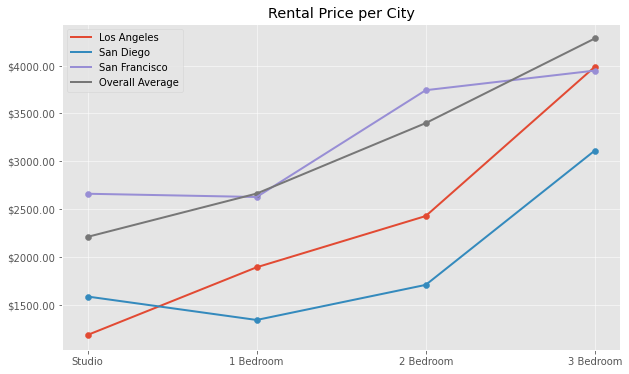

In [120]:
fig, ax = plt.subplots(figsize = (10,6))
x = [1,2,3,4]
ax.plot(x, top5_avg_numeric.loc['Los Angeles'], label = 'Los Angeles')
ax.scatter(x, top5_avg_numeric.loc['Los Angeles'])
ax.plot(x, top5_avg_numeric.loc['San Diego'], label = 'San Diego')
ax.scatter(x, top5_avg_numeric.loc['San Diego'])
ax.plot(x, top5_avg_numeric.loc['San Francisco'], label = 'San Francisco')
ax.scatter(x, top5_avg_numeric.loc['San Francisco'])
# ax.plot(x, top5_avg_numeric.loc['San Jose'], label = 'San Jose')
# ax.scatter(x, top5_avg_numeric.loc['San Jose'])
# ax.plot(x, top5_avg_numeric.loc['Oakland'], label = 'Oakland')
# ax.scatter(x, top5_avg_numeric.loc['Oakland'])
ax.plot(x, top5_avg_numeric.loc['Overall Average'], label = 'Overall Average')
ax.scatter(x, top5_avg_numeric.loc['Overall Average'])
ax.set_xticks(np.arange(1,5))
ax.set_xticklabels(top5_avg_numeric.columns)
ax.yaxis.set_major_formatter('${x:1.2f}')
ax.set_title("Rental Price per City")

ax.legend()

In [35]:
city_dummies = pd.get_dummies(data['city'])
top5_city_dunnies = city_dummies[['Los Angeles', 'San Diego', 'San Francisco', 'San Jose', 'Oakland']]

In [40]:
data1 = pd.concat([data, top5_city_dunnies], axis=1)
data1[data1['city'] == 'San Francisco']

,url,property_name,city,rent_updated,n_bed,n_bath,sq_ft_updated,walkscore,allow_pet,minimum_lease,...,security_system,washer_dryer,internet,air_conditioning,furnished,Los Angeles,San Diego,San Francisco,San Jose,Oakland
108,https://www.apartments.com/mark-hopkins-san-fr...,MARK HOPKINS,San Francisco,2250.0,0,1.0,300.0,98.0,0,1,...,1,0,1,0,0,0,0,1,0,0
109,https://www.apartments.com/mark-hopkins-san-fr...,MARK HOPKINS,San Francisco,2800.0,1,1.0,465.0,98.0,0,1,...,1,0,1,0,0,0,0,1,0,0
128,https://www.apartments.com/1995-chestnut-stree...,1995 Chestnut Street Apartments,San Francisco,3000.0,1,1.0,650.0,98.0,0,12,...,1,0,0,1,0,0,0,1,0,0
129,https://www.apartments.com/1995-chestnut-stree...,1995 Chestnut Street Apartments,San Francisco,3500.0,2,1.0,950.0,98.0,0,12,...,1,0,0,1,0,0,0,1,0,0
360,https://www.apartments.com/24-franklin-san-fra...,24 Franklin,San Francisco,2665.0,0,1.0,580.0,99.0,0,12,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15318,https://www.apartments.com/avalon-hayes-valley...,Avalon Hayes Valley,San Francisco,3375.0,1,1.0,768.0,99.0,1,8,...,0,1,1,1,0,0,0,1,0,0
15319,https://www.apartments.com/avalon-hayes-valley...,Avalon Hayes Valley,San Francisco,3900.0,1,1.0,609.0,99.0,1,8,...,0,1,1,1,0,0,0,1,0,0
15320,https://www.apartments.com/avalon-hayes-valley...,Avalon Hayes Valley,San Francisco,4290.0,2,2.0,1010.0,99.0,1,8,...,0,1,1,1,0,0,0,1,0,0
15321,https://www.apartments.com/avalon-hayes-valley...,Avalon Hayes Valley,San Francisco,4385.0,2,2.0,1127.0,99.0,1,8,...,0,1,1,1,0,0,0,1,0,0


In [42]:
data1.columns

Index(['url', 'property_name', 'city', 'rent_updated', 'n_bed', 'n_bath',
       'sq_ft_updated', 'walkscore', 'allow_pet', 'minimum_lease',
       'onsite_parking', 'pool', 'fitness_center', 'elevator',
       'kitchen_features', 'security_system', 'washer_dryer', 'internet',
       'air_conditioning', 'furnished', 'Los Angeles', 'San Diego',
       'San Francisco', 'San Jose', 'Oakland'],
      dtype='object')

In [49]:
data2 = data1[['rent_updated', 'n_bed', 'n_bath','sq_ft_updated', 'Los Angeles', 'San Diego',
       'San Francisco', 'San Jose', 'Oakland', 'walkscore', 'minimum_lease', 'kitchen_features', 
        'washer_dryer', 'internet','air_conditioning', 
       'onsite_parking','elevator', 'pool', 'fitness_center', 'allow_pet',
       'security_system', 'furnished']]

In [50]:
data2.columns

Index(['rent_updated', 'n_bed', 'n_bath', 'sq_ft_updated', 'Los Angeles',
       'San Diego', 'San Francisco', 'San Jose', 'Oakland', 'walkscore',
       'minimum_lease', 'kitchen_features', 'washer_dryer', 'internet',
       'air_conditioning', 'onsite_parking', 'elevator', 'pool',
       'fitness_center', 'allow_pet', 'security_system', 'furnished'],
      dtype='object')

[Text(0.5, 0, 'Rental Price'),
 Text(1.5, 0, 'Number of Beds'),
 Text(2.5, 0, 'Number of Baths'),
 Text(3.5, 0, 'SQ-FT'),
 Text(4.5, 0, 'Los Angeles'),
 Text(5.5, 0, 'San Diego'),
 Text(6.5, 0, 'San Francisco'),
 Text(7.5, 0, 'San Jose'),
 Text(8.5, 0, 'Oakland'),
 Text(9.5, 0, 'walkscore'),
 Text(10.5, 0, 'Minimum Lease Length'),
 Text(11.5, 0, 'Number of Kitchen Features'),
 Text(12.5, 0, 'Washer/Dryer'),
 Text(13.5, 0, 'WiFi'),
 Text(14.5, 0, 'Air Conditioning'),
 Text(15.5, 0, 'Onsite Parking'),
 Text(16.5, 0, 'Elevator'),
 Text(17.5, 0, 'Pool'),
 Text(18.5, 0, 'Fitness Center'),
 Text(19.5, 0, 'Allow Pets'),
 Text(20.5, 0, 'Security System'),
 Text(21.5, 0, 'Furnished')]

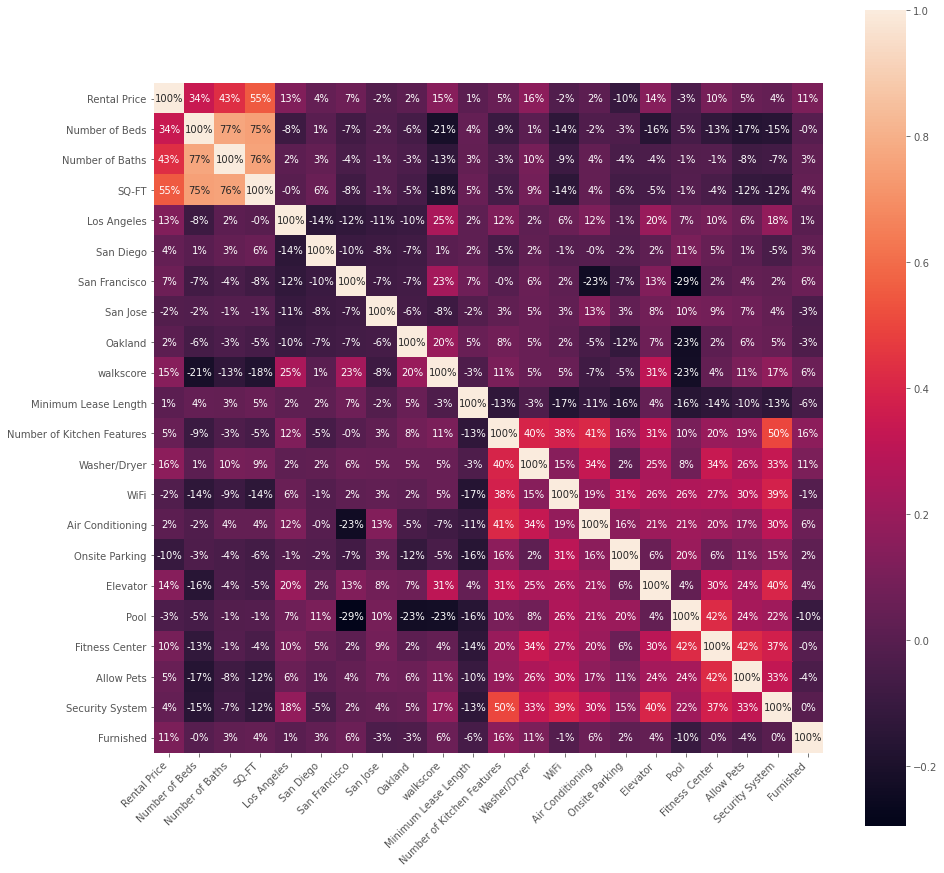

In [101]:
data2.rename(columns = {'rent_updated':'Rental Price','n_bed':'Number of Beds','n_bath':'Number of Baths',
                        'sq_ft_updated':'SQ-FT','allow_pet':'Allow Pets','minimum_lease':'Minimum Lease Length',
                        'onsite_parking':'Onsite Parking','pool':'Pool','fitness_center':'Fitness Center', 
                        'elevator':'Elevator', 'kitchen_features': 'Number of Kitchen Features', 
                        'security_system':'Security System','washer_dryer':'Washer/Dryer', 'internet':'WiFi', 
                        'air_conditioning':'Air Conditioning', 'furnished':'Furnished'},inplace=True)

fig, ax = plt.subplots(figsize=(15,15))
chart = sns.heatmap(data2.corr(),annot=True,ax=ax, square=True, fmt='0.0%')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

# does taking the average make a difference?

In [102]:
data2.columns

Index(['Rental Price', 'Number of Beds', 'Number of Baths', 'SQ-FT',
       'Los Angeles', 'San Diego', 'San Francisco', 'San Jose', 'Oakland',
       'walkscore', 'Minimum Lease Length', 'Number of Kitchen Features',
       'Washer/Dryer', 'WiFi', 'Air Conditioning', 'Onsite Parking',
       'Elevator', 'Pool', 'Fitness Center', 'Allow Pets', 'Security System',
       'Furnished'],
      dtype='object')

## Modeling

In [123]:
# train test split
data1.columns

Index(['url', 'property_name', 'city', 'rent_updated', 'n_bed', 'n_bath',
       'sq_ft_updated', 'walkscore', 'allow_pet', 'minimum_lease',
       'onsite_parking', 'pool', 'fitness_center', 'elevator',
       'kitchen_features', 'security_system', 'washer_dryer', 'internet',
       'air_conditioning', 'furnished', 'Los Angeles', 'San Diego',
       'San Francisco', 'San Jose', 'Oakland'],
      dtype='object')

In [124]:
X_all = data1[[ 'n_bed', 'n_bath',
       'sq_ft_updated', 'walkscore', 'allow_pet', 'minimum_lease',
       'onsite_parking', 'pool', 'fitness_center', 'elevator',
       'kitchen_features', 'security_system', 'washer_dryer', 'internet',
       'air_conditioning', 'furnished', 'Los Angeles', 'San Diego',
       'San Francisco', 'San Jose', 'Oakland']]

y_all = data1['rent_updated']

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all)

In [186]:
def cross_val(X_train, y_train, k, regression = None):
    kf = KFold(n_splits=k, shuffle=True)
    scores = []
    
    if regression:
        scaler = StandardScaler()
        X_std = scaler.fit_transform(X_train)
        model = regression
        for train, test in kf.split(X_std):
            model.fit(X_std[train], y_train.iloc[train])
            y_pred = model.predict(X_std[test])
            scores.append(mean_squared_error(y_train.iloc[test], y_pred))
            
    else:
        for train, test in kf.split(X_train):
            y_pred = np.full(y_train.iloc[test].shape, np.mean(y_train.iloc[train]))
            scores.append(mean_squared_error(y_train.iloc[test], y_pred))
        
    return np.sqrt(np.mean(scores))

In [187]:
# Baseline
cross_val(X_train, y_train, k = 10, regression = None)

1864.153817574925

In [188]:
# Linear Regression
linear_regression = LinearRegression()
cross_val(X_train, y_train, k = 10, regression = linear_regression)

1462.1896633424296

In [208]:
# Ridge Regression
alphas = np.linspace(150, 300, 1000)
scaler = StandardScaler()
X_std = scaler.fit_transform(X_train)
regr_cv = RidgeCV(alphas=alphas)
model_cv = regr_cv.fit(X_std, y_train)
model_cv.alpha_

157.95795795795794

In [189]:
ridge_regression = Ridge(alpha = 158)
cross_val(X_train, y_train, k = 10, regression = ridge_regression)

1455.1692079539812

In [195]:
len(X_train)

11691

In [201]:
# Decision Tree
dt_grid = {'max_depth': [3, None],
            'max_features': ['sqrt', 'log2', None],
            'min_samples_split': [1, 2, 4],
            'min_samples_leaf': [10, 12, 15, 17, 20],
            'random_state': [1]}

dt_gridsearch = GridSearchCV(DecisionTreeRegressor(),
                         dt_grid,
                             n_jobs=-1,
                             verbose=True,
                             scoring='neg_mean_squared_error')
dt_gridsearch.fit(X_train, y_train)

print("best parameters:", dt_gridsearch.best_params_)

best_dt_model = dt_gridsearch.best_estimator_

Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 tasks      | elapsed:    0.3s


best parameters: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 17, 'min_samples_split': 2, 'random_state': 1}


[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:    1.1s finished


In [204]:
cross_val(X_train, y_train, k = 10, regression = best_dt_model)

1379.9098751783827

In [219]:
# Random Forest

random_forest_grid = {'max_depth': [5, None],
                      'max_features': ['sqrt', 'log2', None],
                      'min_samples_split': [2, 4, 6],
                      'min_samples_leaf': [1, 2, 4],
                      'bootstrap': [True, False],
                      'n_estimators': [80, 100, 120],
                      'random_state': [1]}

rf_gridsearch = GridSearchCV(RandomForestRegressor(),
                             random_forest_grid,
                             n_jobs=-1,
                             verbose=True,
                             scoring='neg_mean_squared_error')
rf_gridsearch.fit(X_train, y_train)

print("best parameters:", rf_gridsearch.best_params_)

best_rf_model = rf_gridsearch.best_estimator_

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done 438 tasks      | elapsed:   39.9s
[Parallel(n_jobs=-1)]: Done 788 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1238 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 1620 out of 1620 | elapsed:  4.8min finished


best parameters: {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 100, 'random_state': 1}


In [220]:
cross_val(X_train, y_train, k = 10, regression = best_rf_model)

1126.453391379119

In [224]:
# Gradient Boosting

boost_grid = {'learning_rate': [0.01, 0.03, 0.1, 0.3],
              'max_depth': [3, None],
              'max_features': ['sqrt', 'log2', None],
              'min_samples_leaf': [ 2, 4],
              'n_estimators': [10, 20, 40, 80],
              'random_state': [1]}

gb_gridsearch = GridSearchCV(GradientBoostingRegressor(n_estimators=1000),
                             boost_grid,
                             n_jobs=-1,
                             verbose=True,
                             scoring='neg_mean_squared_error')
gb_gridsearch.fit(X_train, y_train)

print("best parameters:", gb_gridsearch.best_params_)

best_gb_model = gb_gridsearch.best_estimator_

Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  92 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 340 tasks      | elapsed:   19.3s
[Parallel(n_jobs=-1)]: Done 726 tasks      | elapsed:   54.7s
[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed:  1.4min finished


best parameters: {'learning_rate': 0.1, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'n_estimators': 40, 'random_state': 1}


In [223]:
cross_val(X_train, y_train, k = 10, regression = best_gb_model)

1118.6529514820709

In [ ]:
#show that 3 bedrooms and above are crazy and could affect the performance

In [235]:
# Try dropping all the data with bed > 3
X_0to3 = data1[[ 'n_bed', 'n_bath',
       'sq_ft_updated', 'walkscore', 'allow_pet', 'minimum_lease',
       'onsite_parking', 'pool', 'fitness_center', 'elevator',
       'kitchen_features', 'security_system', 'washer_dryer', 'internet',
       'air_conditioning', 'furnished', 'Los Angeles', 'San Diego',
       'San Francisco', 'San Jose', 'Oakland']][data1.n_bed < 4]

y_0to3 = data1['rent_updated'][data1.n_bed < 4]

X_train, X_test, y_train, y_test = train_test_split(X_0to3, y_0to3)

In [236]:
# Baseline
cross_val(X_train, y_train, k = 10, regression = None)

1667.169978643364

In [237]:
# Linear Regression
linear_regression = LinearRegression()
cross_val(X_train, y_train, k = 10, regression = linear_regression)

1320.7746661930598

In [238]:
# Ridge Regression
alphas = np.linspace(150, 300, 1000)
scaler = StandardScaler()
X_std = scaler.fit_transform(X_train)
regr_cv = RidgeCV(alphas=alphas)
model_cv = regr_cv.fit(X_std, y_train)
model_cv.alpha_

273.5735735735736

In [239]:
ridge_regression = Ridge(alpha = 274)
cross_val(X_train, y_train, k = 10, regression = ridge_regression)

1319.2446150639764

In [240]:
# Decision Tree
dt_grid = {'max_depth': [3, None],
            'max_features': ['sqrt', 'log2', None],
            'min_samples_split': [1, 2, 4],
            'min_samples_leaf': [15, 20, 25, 30, 35],
            'random_state': [1]}

dt_gridsearch = GridSearchCV(DecisionTreeRegressor(),
                         dt_grid,
                             n_jobs=-1,
                             verbose=True,
                             scoring='neg_mean_squared_error')
dt_gridsearch.fit(X_train, y_train)

print("best parameters:", dt_gridsearch.best_params_)

best_dt_model = dt_gridsearch.best_estimator_

Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    2.1s


best parameters: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 20, 'min_samples_split': 2, 'random_state': 1}


[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:    3.0s finished


In [246]:
cross_val(X_train, y_train, k = 10, regression = best_dt_model)

1238.7952782841057

In [247]:
# Random Forest

random_forest_grid = {'max_depth': [5, None],
                      'max_features': ['sqrt', 'log2', None],
                      'min_samples_split': [2, 4, 6],
                      'min_samples_leaf': [2, 4],
                      'bootstrap': [True, False],
                      'n_estimators': [80, 100, 120],
                      'random_state': [1]}

rf_gridsearch = GridSearchCV(RandomForestRegressor(),
                             random_forest_grid,
                             n_jobs=-1,
                             verbose=True,
                             scoring='neg_mean_squared_error')
rf_gridsearch.fit(X_train, y_train)

print("best parameters:", rf_gridsearch.best_params_)

best_rf_model = rf_gridsearch.best_estimator_

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done 438 tasks      | elapsed:   43.1s
[Parallel(n_jobs=-1)]: Done 788 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  3.0min finished


best parameters: {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 120, 'random_state': 1}


In [248]:
cross_val(X_train, y_train, k = 10, regression = best_rf_model)

1003.7746738741937

In [249]:
# Random Forest

random_forest_grid = {'max_depth': [3, 5, None],
                      'max_features': ['sqrt', 'log2', None],
                      'min_samples_split': [4, 6, 8],
                      'min_samples_leaf': [2, 4],
                      'bootstrap': [True, False],
                      'n_estimators': [80, 100, 120, 150],
                      'random_state': [1]}

rf_gridsearch = GridSearchCV(RandomForestRegressor(),
                             random_forest_grid,
                             n_jobs=-1,
                             verbose=True,
                             scoring='neg_mean_squared_error')
rf_gridsearch.fit(X_train, y_train)

print("best parameters:", rf_gridsearch.best_params_)

best_rf_model = rf_gridsearch.best_estimator_

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 438 tasks      | elapsed:   29.3s
[Parallel(n_jobs=-1)]: Done 788 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1238 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 1788 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed:  5.3min finished


best parameters: {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 150, 'random_state': 1}


In [250]:
cross_val(X_train, y_train, k = 10, regression = best_rf_model)

999.3657638133778

In [253]:
# Gradient Boosting

boost_grid = {'learning_rate': [0.03, 0.05, 0.1, 0.3],
              'max_depth': [3,5, None],
              'max_features': ['sqrt', 'log2', None],
              'min_samples_leaf': [2, 4],
              'n_estimators': [50, 100, 150],
              'random_state': [1]}

gb_gridsearch = GridSearchCV(GradientBoostingRegressor(n_estimators=500),
                             boost_grid,
                             n_jobs=-1,
                             verbose=True,
                             scoring='neg_mean_squared_error')
gb_gridsearch.fit(X_train, y_train)

print("best parameters:", gb_gridsearch.best_params_)

best_gb_model = gb_gridsearch.best_estimator_

cross_val(X_train, y_train, k = 10, regression = best_gb_model)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:   17.8s
[Parallel(n_jobs=-1)]: Done 438 tasks      | elapsed:   59.1s
[Parallel(n_jobs=-1)]: Done 788 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  3.8min finished


best parameters: {'learning_rate': 0.05, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'n_estimators': 150, 'random_state': 1}


929.3223732940174

In [254]:
# Gradient Boosting

boost_grid = {'learning_rate': [0.03, 0.05, 0.1, 0.3],
              'max_depth': [3, None],
              'max_features': ['sqrt',  None],
              'min_samples_leaf': [2, 4],
              'n_estimators': [100, 150, 170],
              'random_state': [1]}

gb_gridsearch = GridSearchCV(GradientBoostingRegressor(n_estimators=500),
                             boost_grid,
                             n_jobs=-1,
                             verbose=True,
                             scoring='neg_mean_squared_error')
gb_gridsearch.fit(X_train, y_train)

print("best parameters:", gb_gridsearch.best_params_)

best_gb_model = gb_gridsearch.best_estimator_

cross_val(X_train, y_train, k = 10, regression = best_gb_model)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:   58.5s
[Parallel(n_jobs=-1)]: Done 438 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  3.8min finished


best parameters: {'learning_rate': 0.05, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'n_estimators': 170, 'random_state': 1}


955.0091183066819

In [234]:
# Exact